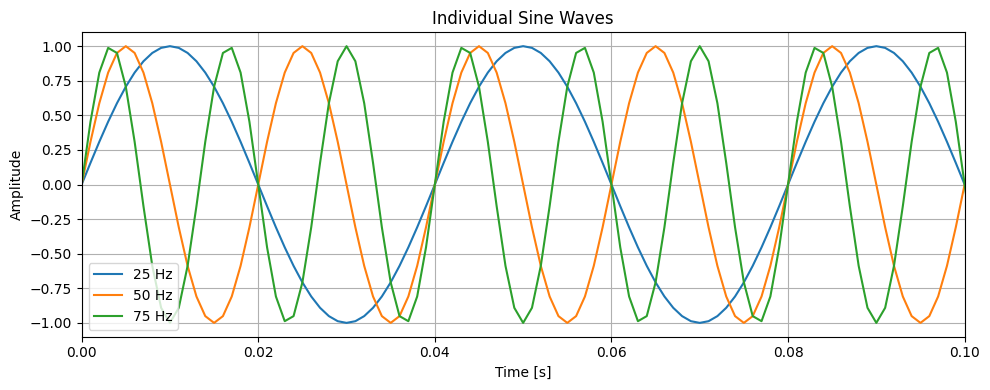

In [4]:
# Cell 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift

# Cell 2: Define parameters
fs = 1000  # Sampling frequency (Hz)
T = 1.0    # Duration (seconds)
t = np.linspace(0.0, T, int(fs*T), endpoint=False)  # Time vector

# Frequencies of the sine waves
f1 = 25
f2 = 50
f3 = 75

# Cell 3: Create and sum sine waves
sine1 = np.sin(2 * np.pi * f1 * t)
sine2 = np.sin(2 * np.pi * f2 * t)
sine3 = np.sin(2 * np.pi * f3 * t)

plt.figure(figsize=(10, 4))
plt.plot(t, sine1, label='25 Hz')
plt.plot(t, sine2, label='50 Hz')
plt.plot(t, sine3, label='75 Hz')
plt.title("Individual Sine Waves")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim(0, 0.1)  # <-- zoom into first 0.1 seconds
plt.tight_layout()
plt.show()



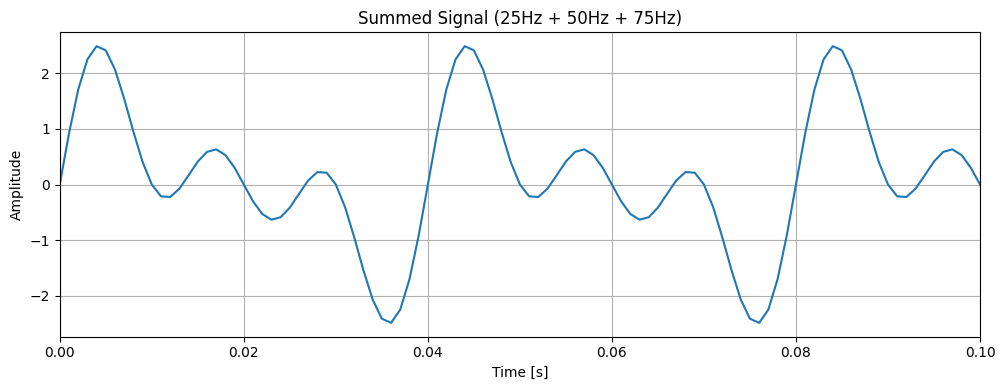

In [6]:


summed_signal = sine1 + sine2 + sine3

# Plot the summed signal
plt.figure(figsize=(10, 4))
plt.plot(t, summed_signal)
plt.title("Summed Signal (25Hz + 50Hz + 75Hz)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 0.1)  # <-- zoom into first 0.1 seconds
plt.show()



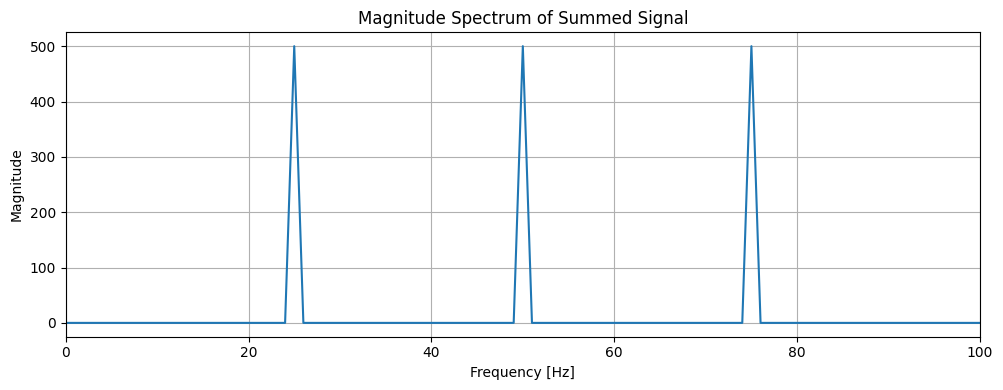

In [7]:


# Cell 4: Fourier Transform
N = len(summed_signal)
yf = fft(summed_signal)
xf = fftfreq(N, 1/fs)

# Only keep the positive frequencies
mask = xf >= 0

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(xf[mask], np.abs(yf[mask]))
plt.title("Magnitude Spectrum of Summed Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 100)
plt.show()



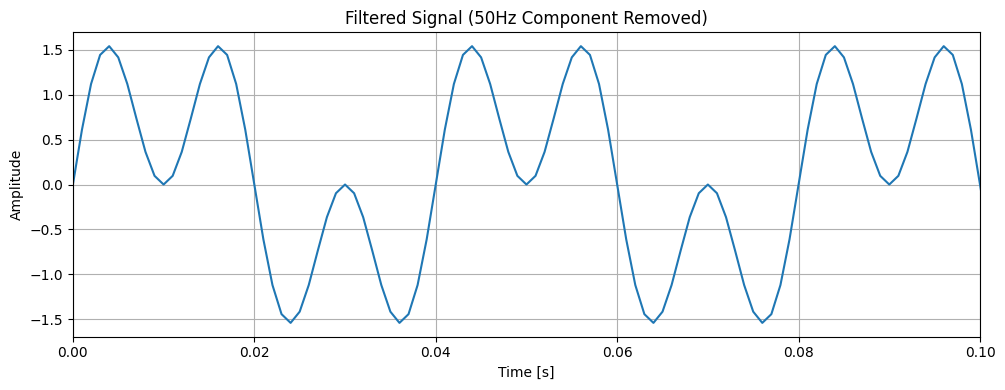

In [ ]:


# Cell 5: Remove 50 Hz component
yf_filtered = yf.copy()
idx_50hz = np.argmin(np.abs(xf - 50))
yf_filtered[idx_50hz] = 0

# Remove symmetric negative frequency component too
idx_50hz_neg = np.argmin(np.abs(xf + 50))
yf_filtered[idx_50hz_neg] = 0

# Inverse FFT to get back to time domain
filtered_signal = np.real(ifft(yf_filtered))

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.title("Filtered Signal (50Hz Component Removed)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.xlim(0,0.1)
plt.show()
